# Loading data

In [1]:
import pandas as pd
import csv
import chardet

#LOAD the Data

shear_df = pd.read_csv('Dataset/data_nk_new.csv',sep=",",header=None)

new_header2 = shear_df.iloc[0] 
shear_df = shear_df[1:] 
shear_df.columns = new_header2 

shear_df = shear_df[shear_df['Foam_quality'] == '95']
#shear_df_75 = shear_df[shear_df['Foam_quality'] == '75']
#shear_df = shear_df[shear_df['Temperature'] == '25']
#shear_df.drop(['Foam_quality', 'Foam_CO2','Foam_AOS','Foam_NaCl','Foam_SiO2','Pa','Foam_XG', "viscosity_cp", "shear_rate"], axis=1, inplace=True)
shear_df

,Foam_quality,Temperature,N,K,Foam
1,95,25,0.62,57,1
2,95,50,0.64,36.3,1
3,95,80,0.7,16.61,1
4,95,25,0.62,28.2,2
5,95,50,0.64,22.2,2
6,95,80,0.78,6.586,2
7,95,25,0.53,65.5,3
8,95,50,0.6,44,3
9,95,80,0.64,27.1,3
10,95,25,0.57,75.9,4


In [2]:
shear_df.describe()

,Foam_quality,Temperature,N,K,Foam
count,12,12,12,12,12
unique,1,3,8,12,4
top,95,50,0.64,22.2,3
freq,12,4,4,1,3


# Visualize shear_rate vs viscosity (cP) using scatter plot

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
%matplotlib inline

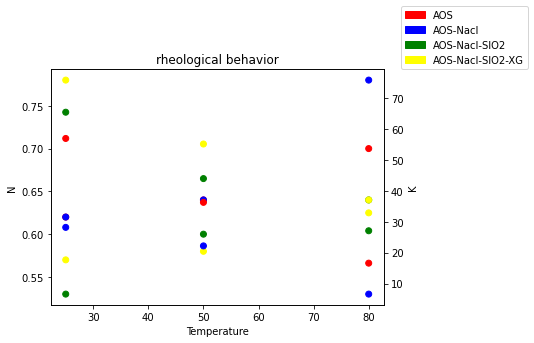

In [4]:
fig, ax = plt.subplots()


shear_df.N=pd.to_numeric(shear_df.N)
shear_df.K=pd.to_numeric(shear_df.K)
shear_df.Temperature=pd.to_numeric(shear_df.Temperature)

colors = {'1':'red', '2':'blue', '3':'green', '4':'Yellow'}
ax.scatter(shear_df.Temperature, shear_df.N,  c=shear_df.Foam.apply(lambda x: colors[x]))
ax.set_xlabel('Temperature')
ax.set_ylabel('N')

ax2 = ax.twinx()   
ax2.scatter(shear_df.Temperature, shear_df.K,  c=shear_df.Foam.apply(lambda x: colors[x]))
ax2.set_ylabel('K')
fig.tight_layout() 

# build the legend
red_patch = mpatches.Patch(color='red', label='AOS')
blue_patch = mpatches.Patch(color='blue', label='AOS-Nacl')
green_patch = mpatches.Patch(color='green', label='AOS-Nacl-SIO2')
yellow_patch = mpatches.Patch(color='yellow', label='AOS-Nacl-SIO2-XG')

# set up for handles declaration
patches = [red_patch, blue_patch, green_patch, yellow_patch]

# alternative declaration for placing legend outside of plot
legend = ax.legend(handles=patches,bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)

plt.title('rheological behavior')


plt.show()

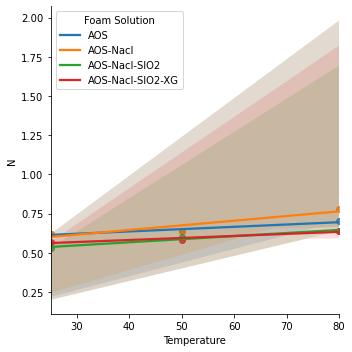

In [5]:
sns.lmplot(data=shear_df, x="Temperature", y="N", hue="Foam" , legend=False )

plt.legend(title='Foam Solution', loc='upper left', labels=['AOS', 'AOS-Nacl','AOS-Nacl-SIO2', 'AOS-Nacl-SIO2-XG'])


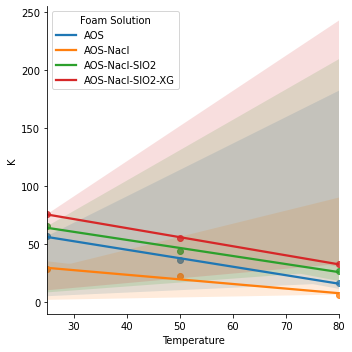

In [6]:
g=sns.lmplot(data=shear_df, x="Temperature", y="K",  hue="Foam", legend=False )

plt.legend(title='Foam Solution', loc='upper left', labels=['AOS', 'AOS-Nacl','AOS-Nacl-SIO2', 'AOS-Nacl-SIO2-XG'])


C:\Users\maab_\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


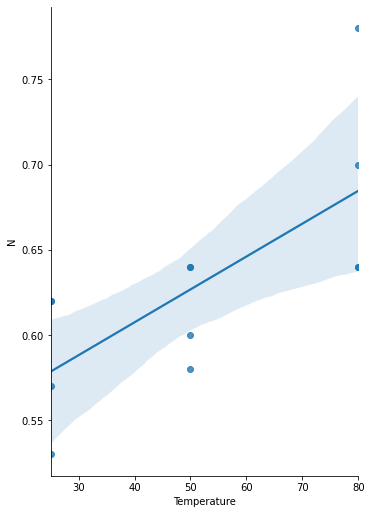

In [7]:
sns.pairplot(shear_df, x_vars='Temperature', y_vars='N', size=7, aspect=0.7, kind='reg')

C:\Users\maab_\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


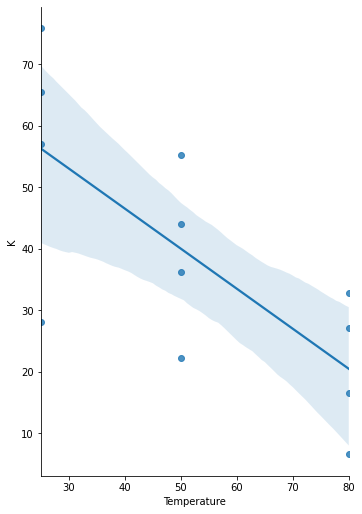

In [8]:
sns.pairplot(shear_df, x_vars='Temperature', y_vars='K', size=7, aspect=0.7, kind='reg')

# Estimate Model Coefficients

In [9]:
### STATSMODELS ###
import statsmodels.formula.api as smf
lm1 = smf.ols(formula='N ~ Temperature + Foam', data=shear_df).fit()

# print the coefficients
lm1.params

Intercept      0.553690
Foam[T.2]      0.026667
Foam[T.3]     -0.063333
Foam[T.4]     -0.056667
Temperature    0.001929
dtype: float64

In [10]:
lm2 = smf.ols(formula='K ~ Temperature + Foam', data=shear_df).fit()

# print the coefficients
lm2.params

Intercept      70.262128
Foam[T.2]     -17.641333
Foam[T.3]       8.896667
Foam[T.4]      18.030000
Temperature    -0.650815
dtype: float64

<AxesSubplot:xlabel='N'>

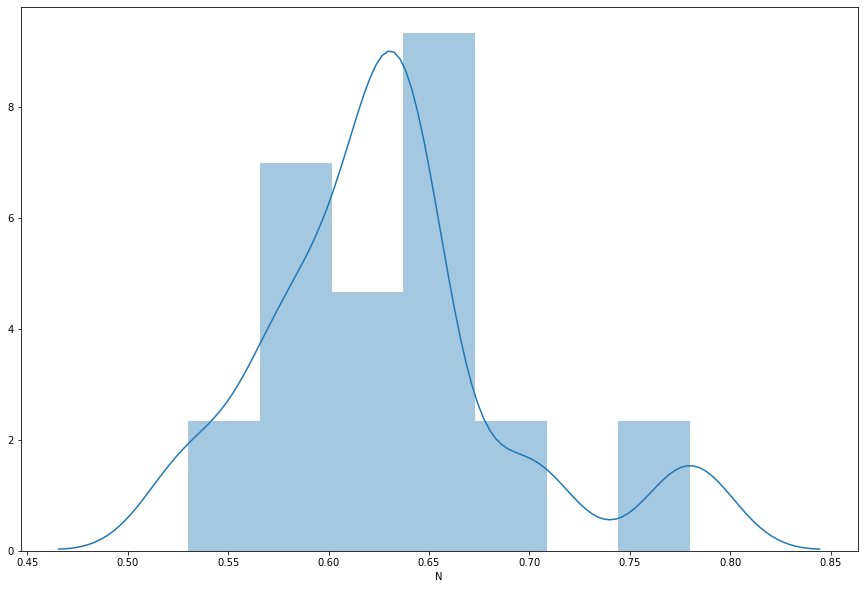

In [11]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(shear_df['N'])

<AxesSubplot:xlabel='K'>

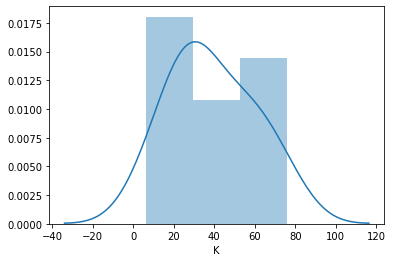

In [12]:
seabornInstance.distplot(shear_df['K'])

## Selecting features and target variable

In [13]:
feature_cols = [ 'Temperature', "Foam"]

from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#shear_df[feature_cols] = scaler.fit_transform(shear_df[feature_cols])
X = shear_df[feature_cols] # Features
X

,Temperature,Foam
1,25,1
2,50,1
3,80,1
4,25,2
5,50,2
6,80,2
7,25,3
8,50,3
9,80,3
10,25,4


In [14]:
y = shear_df.N # Target variable

In [15]:
k_y = shear_df.K # Target variable

# Data splitting

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
k_X_train,k_X_test,k_y_train,k_y_test=train_test_split(X,k_y,test_size=0.2,random_state=0)

## Fit data to a Linear Regression model
- regression technique will find a linear relationship between x (Temperature) and y(N), y(K)

- linear regression algorithm fits multiple lines on the data points and returns the line that results in the least error

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# instantiate the model (using the default parameters)
logreg = LinearRegression()
scores = cross_val_score(logreg, X_train, y_train, scoring='r2', cv=4)
scores 

array([-0.84118254, -1.66783598, -2.33336556, -0.09487227])

In [19]:
k_logreg = LinearRegression()
k_scores = cross_val_score(k_logreg, k_X_train, k_y_train, scoring='r2', cv=4)
k_scores

array([ 0.67891208, -1.68890464, -0.0292499 ,  0.36424351])

In [20]:
# fit the model with data
logreg.fit(X_train,y_train)

LinearRegression()

In [21]:
# fit the model with data
k_logreg.fit(k_X_train,k_y_train)

LinearRegression()

## k-fold cross-validation

C:\Users\maab_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\maab_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\maab_\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\maab_\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWar

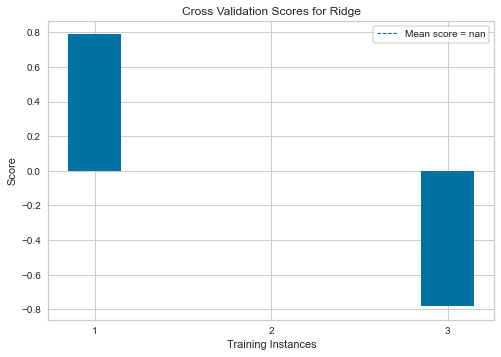

<AxesSubplot:title={'center':'Cross Validation Scores for Ridge'}, xlabel='Training Instances', ylabel='Score'>

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import CVScores

# Instantiate the regression model and visualizer
cv = KFold(n_splits=6, random_state=42)

model = Ridge()
visualizer = CVScores(model, cv=cv, scoring='r2')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()

C:\Users\maab_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\maab_\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\maab_\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\maab_\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


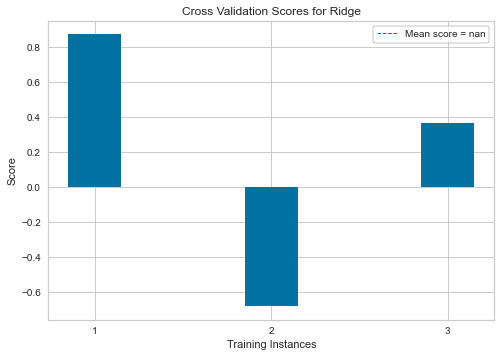

<AxesSubplot:title={'center':'Cross Validation Scores for Ridge'}, xlabel='Training Instances', ylabel='Score'>

In [23]:
cv1 = KFold(n_splits=6, random_state=42)

model1 = Ridge()
visualizer1 = CVScores(model1, cv=cv1, scoring='r2')

visualizer1.fit(k_X_train, k_y_train)        # Fit the data to the visualizer
visualizer1.show()

# Model Coefficients ( β1 )
Y= mx + b. 
(b is the intercept and m is the slope of the line)

*Interpretation
- Intercept: for every one unit of change in Tempreture, the change in the N is about 60%.

In [24]:
#To retrieve the intercept:
print(logreg.intercept_)
#For retrieving the slope:
print(logreg.coef_)

0.6025222429133043
[ 0.00177095 -0.02362818]


In [25]:
#To retrieve the intercept:
print(k_logreg.intercept_)
#For retrieving the slope:
print(k_logreg.coef_)

53.920583488516456
[-0.63181788  7.40028864]


# Predict (cP) using the Model (y=β0+β1x)

In [26]:
# try the testset
y_pred=logreg.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
7,0.53,0.575911
12,0.64,0.649685
5,0.64,0.643813


In [27]:

# try the testset
k_y_pred=k_logreg.predict(k_X_test)

k_df = pd.DataFrame({'Actual': k_y_test, 'Predicted': k_y_pred})
k_df

,Actual,Predicted
7,65.5,60.326002
12,32.9,32.976308
5,22.2,37.130267


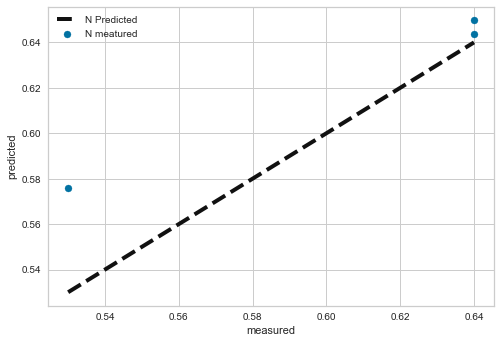

In [28]:
# plotting the regression line on the scatter plot
#plt.figure(figsize=(10,6))
#plt.scatter(X_test, y_test)
#plt.plot(X_test, y_pred, c='r')
#plt.title('Scatter plot and a Simple Linear Regression Model')
#plt.ylabel("N")
#plt.xlabel("Tempreture")
#plt.show()

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, label='N meatured')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, label='N Predicted')
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
ax.legend()
plt.show()



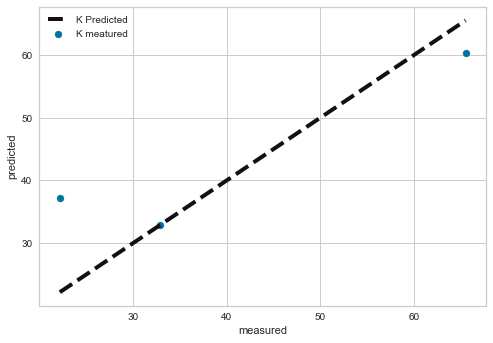

In [29]:
fig, ax = plt.subplots()
ax.scatter(k_y_test, k_y_pred, label='K meatured')
ax.plot([k_y_test.min(), k_y_test.max()], [k_y_test.min(), k_y_test.max()], 'k--', lw=4, label='K Predicted')
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
ax.legend()
plt.show()


AttributeError: 'list' object has no attribute 'ndim'

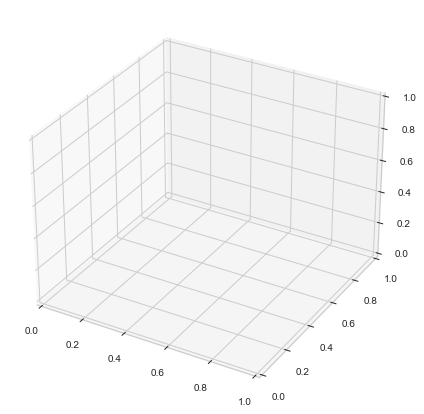

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()
ax = Axes3D(fig)

x=[1,2,3,4,5]
y=[1,3,5,6,8]
z=[3,3,5,6,7]
x, y= np.meshgrid(x,y)


ax.plot_surface(x,y,z)

plt.show()

## Model Evaluation

In [326]:
from sklearn import metrics

# calculate MAE, MSE, RMSE
#MAE
print(metrics.mean_absolute_error(y_test, y_pred))
#MSE
print(metrics.mean_squared_error(y_test, y_pred))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.01980343471963571
0.0007387370365532546
0.027179717374418273


In [327]:
print(metrics.mean_absolute_error(k_y_test, k_y_pred))
print(metrics.mean_squared_error(k_y_test, k_y_pred))
print(np.sqrt(metrics.mean_squared_error(k_y_test, k_y_pred)))

6.726857438444035
83.22964778388032
9.123028432701519


# Confidence in the Model

In [161]:
# print the confidence intervals for the model coefficients
print(lm1.conf_int())
print(lm2.conf_int())

                    0         1
Intercept    0.517940  0.869037
Foam[T.2]   -0.258558  0.067424
Foam[T.3]   -0.421524 -0.095542
Foam[T.4]   -0.292858  0.033124
Temperature -0.001955  0.003171
                     0           1
Intercept   -13.776681   74.269034
Foam[T.2]   -33.183713   48.563713
Foam[T.3]    35.456287  117.203713
Foam[T.4]    -5.777046   75.970380
Temperature  -0.822893    0.462525


# Hypothesis Testing and p-values

In [162]:
print(lm1.pvalues)
print(lm2.pvalues)

Intercept      0.000033
Foam[T.2]      0.208160
Foam[T.3]      0.007161
Foam[T.4]      0.101557
Temperature    0.592340
dtype: float64
Intercept      0.148270
Foam[T.2]      0.669836
Foam[T.3]      0.003097
Foam[T.4]      0.081863
Temperature    0.528596
dtype: float64


In [548]:
### STATSMODELS ###

# print the R-squared value for the model
print(lm1.rsquared)
print(lm2.rsquared)

0.8604245678525619
0.8160009341914618


In [549]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
print(logreg.score(X, y))
print(k_logreg.score(X, k_y))

0.49224496480013313
0.5298792363259897


In [550]:
### STATSMODELS ###

# create a fitted model with the 2 features
lm1 = smf.ols(formula='N ~ Temperature + Foam', data=shear_df).fit()

# print the coefficients
lm1.params

Intercept      0.551777
Foam[T.2]      0.030000
Foam[T.3]     -0.113333
Foam[T.4]     -0.043333
Temperature    0.001901
dtype: float64

In [551]:
### STATSMODELS ###

# create a fitted model with the 2 features
lm2 = smf.ols(formula='N ~ Temperature + Foam', data=shear_df).fit()

# print the coefficients
lm2.params

Intercept      0.551777
Foam[T.2]      0.030000
Foam[T.3]     -0.113333
Foam[T.4]     -0.043333
Temperature    0.001901
dtype: float64

In [552]:
# pair the feature names with the coefficients
print(list(zip(feature_cols, logreg.coef_)))
print(list(zip(feature_cols, k_logreg.coef_)))

[('Temperature', 0.0015977653631284916), ('Foam', -0.02656114214773433)]
[('Temperature', -0.6906782122905029), ('Foam', 6.495915580384856)]


In [553]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

C:\Users\maab_\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      N   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     10.79
Date:                Sat, 24 Oct 2020   Prob (F-statistic):            0.00408
Time:                        22:59:03   Log-Likelihood:                 26.009
No. Observations:                  12   AIC:                            -42.02
Df Residuals:                       7   BIC:                            -39.59
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5518      0.032     17.300      0.000       0.476       0.627
Foam[T.2]       0.0300      0.030      1.013      0.345      -0.040       0.100
Foam[T.3]      -0.1133      0.030     -3.827      0.006      -0.183      -0.043
Foam[T.4]      -0.0433      0.030     -1.463      0.187      -0.113       0.027
Temperature     0.0019      0.000      4.083      0.005       0.001       0.003
==============================================================================
Omnibus:                        0.779   Durbin-Watson:                   2.349
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.637
Skew:                           0.185   Prob(JB):                        0.727
Kurtosis:                       1.934   Cond. No.                         254.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [554]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      N   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     10.79
Date:                Sat, 24 Oct 2020   Prob (F-statistic):            0.00408
Time:                        22:59:04   Log-Likelihood:                 26.009
No. Observations:                  12   AIC:                            -42.02
Df Residuals:                       7   BIC:                            -39.59
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5518      0.032     17.300      0.000       0.476       0.627
Foam[T.2]       0.0300      0.030      1.013      0.345      -0.040       0.100
Foam[T.3]      -0.1133      0.030     -3.827      0.006      -0.183      -0.043
Foam[T.4]      -0.0433      0.030     -1.463      0.187      -0.113       0.027
Temperature     0.0019      0.000      4.083      0.005       0.001       0.003
==============================================================================
Omnibus:                        0.779   Durbin-Watson:                   2.349
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.637
Skew:                           0.185   Prob(JB):                        0.727
Kurtosis:                       1.934   Cond. No.                         254.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Actual vs Predicted 

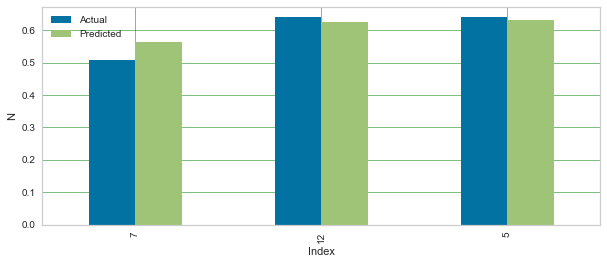

In [557]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel('N')
plt.xlabel('Index')
plt.show()


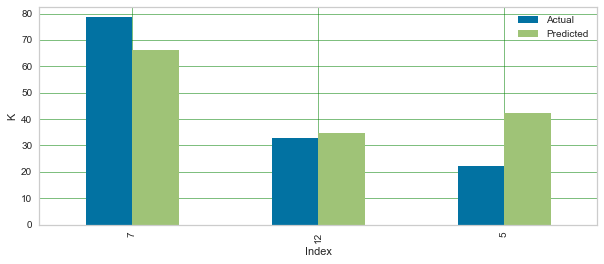

In [558]:
df2 = k_df.head(25)
df2.plot(kind='bar',figsize=(10,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel('K')
plt.xlabel('Index')
plt.show()

## ---------------------------------

# Compare

In [567]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

feature_cols = ['Temperature', 'Foam']

X = shear_df[feature_cols] # Features
y = shear_df.N # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# instantiate the model (using the default parameters)
logreg = LinearRegression()

# fit the model with data
logreg.fit(X_train,y_train)
# try the testset
y_pred=logreg.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(5))
# calculate MAE, MSE, RMSE
#MAE
print(metrics.mean_absolute_error(y_test, y_pred))
#MSE
print(metrics.mean_squared_error(y_test, y_pred))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("Formula: ")
#To retrieve the intercept:
print(logreg.intercept_)
#For retrieving the slope:
print(logreg.coef_)

    Actual  Predicted
7     0.51   0.565241
12    0.64   0.626557
5     0.64   0.631746
0.02564590661424922
0.0011001369944004767
0.03316831310755006
Formula: 
0.6049803434719636
[ 0.00159777 -0.02656114]


In [569]:
feature_cols = ['Temperature', 'Foam']

X = shear_df[feature_cols] # Features
y = shear_df.K # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# instantiate the model (using the default parameters)
logreg = LinearRegression()

# fit the model with data
logreg.fit(X_train,y_train)
# try the testset
y_pred=logreg.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(5))
# calculate MAE, MSE, RMSE
#MAE
print(metrics.mean_absolute_error(y_test, y_pred))
#MSE
print(metrics.mean_squared_error(y_test, y_pred))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("Formula: ")
#To retrieve the intercept:
print(logreg.intercept_)
#For retrieving the slope:
print(logreg.coef_)

    Actual  Predicted
7     78.5  66.078252
12    32.9  34.586866
5     22.2  42.315381
11.407998206772882
187.25796327083853
13.684223151894248
Formula: 
63.85746016966687
[-0.69067821  6.49591558]


## ------------------ EXTRA----------------------------------------------------------------

In [ ]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
logreg.conf_int()

In [ ]:
# import the metrics class

from sklearn.metrics import confusion_matrix

#predicted = logreg.predict(X_test)
print(confusion_matrix(y_test,predicted.round()))

In [201]:
# Creating some predictions.
from sklearn.model_selection import cross_val_predict
#y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

## precision and recall

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_pred)
recall_score(y_train, y_pred)

## F1 score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_pred)

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()